# <font color='1C315E'>NYC Property Sales: Regression Analysis</font>

## <font color='1C315E'>Purpose of the Project</font>
The purpose of this project is to use regression techniques to predict the sales price of a NYC home/apartment. 

## <font color='1C315E'>About the Data</font>

This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period from 2016 to 2017. This dataset is a concatenated and slightly cleaned-up version of the New York City Department of Finance's Rolling Sales dataset. Data downloaded from <a href="https://www.kaggle.com/datasets/new-york-city/nyc-property-sales?datasetId=2648&sortBy=relevance">Kaggle Dataset</a>

For full column definitions as defined by the NYC Department of finance, see <a href="https://www.nyc.gov/assets/finance/downloads/pdf/07pdf/glossary_rsf071607.pdf">here.</a>


| Column    | Definition |
| -------- | :------- |
| Borough  | 1:Manhattan, 2:Bronx, 3:Brooklyn, 4:Queens, 5:Staten Island  |
| Neighborhood | Neighborhood Name    |
| Building Class Category    |  Categorization of buidling, i.e. walk-up, elevator building, condo, etc.  |
| Tax Class at Present    | Property in NYC is divided into 4 classes. 1: residential, 2: all other property not included in class 1 and is primarily residential, 3: utility property, 4: commercial industrial. See <a href="https://www.nyc.gov/site/finance/taxes/definitions-of-property-assessment-terms.page">NYC Dept of Finance</a>|
| Block    | City Block Number |
| Lot    |  Lot Number   |
| Ease-ment    |An easement, in most cases, is a non-possessory right to use another party's property for a clearly defined purpose that does not interfere with the owner's right to use the same property.   |
| Building Class at Present    |  Current building class catgegory.  In commercial real estate, office buildings are typically placed in one of three categories: class A, class B, or class C. Each category delineates a different level of price, quality, and amenities. However, since real estate quality varies greatly from place to place, A, B, and C classifications are subjective  |
| Address    |  Street Address   |
| Apartment #    | Aparment # |
| Zip Code    |  Zip Code   |
| Residential Units    |  Number of residential units in the building   |
| Commercial Units    | Number of commercial units in the building |
| Total Units   |  Total units (residential + commercial) in the building   |
| Land Square Feet    | Square feet of the land the building is built on    |
| Gross Square Feet   | The total area of all the floors of a building as measured from the exterior surfaces of the outside walls of the building, including the land area and space within any building or structure on the property.  |
| Year Built  |   Year building was built  |
| Tax Class at Time of Sale   | See above for tax class definitions. |
| Building Class at Time of Sale   |  See above for building class definitions.   |
| Sale Price    |  Amount of sale. Zero values indicate transfer of deeds, for example parent to child.   |
| Sale Date   | Date of sale |



## <font color='1C315E'>Exploratory Data Analysis</font>

In [1]:
# import data and libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/71062489/Downloads/archive/nyc-rolling-sales.csv')

data.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


Column 'Unnamed:0' looks like an index column and can be dropped. Column 'Easement' is blank for all rows, therefore it will not be helpful in analysis and can be dropped. 

I will also drop rows that are very geo-specific as I will not go so detailed as to determine price by address or floor of apartment. 

In [2]:
# drop columns
data = data.drop('Unnamed: 0', axis=1)
data = data.drop('EASE-MENT', axis=1)
data = data.drop('BLOCK', axis=1)
data = data.drop('LOT', axis=1)
data = data.drop('APARTMENT NUMBER', axis=1)
data = data.drop('ADDRESS', axis=1)

In [3]:
# rename columns for use in statsmodels
data.columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BUILDING_CLASS_AT_PRESENT', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE'
             ]

In [4]:
# convert data types as needed
data['LAND_SQUARE_FEET'] = np.where(data["LAND_SQUARE_FEET"] == ' -  ', 0, data['LAND_SQUARE_FEET'])
data["LAND_SQUARE_FEET"] = pd.to_numeric(data["LAND_SQUARE_FEET"])

data['GROSS_SQUARE_FEET'] = np.where(data["GROSS_SQUARE_FEET"] == ' -  ', 0, data['GROSS_SQUARE_FEET'])
data["GROSS_SQUARE_FEET"] = pd.to_numeric(data["GROSS_SQUARE_FEET"])


data['SALE_PRICE'] = np.where(data["SALE_PRICE"] == ' -  ', 0, data['SALE_PRICE'])
data["SALE_PRICE"] = pd.to_numeric(data["SALE_PRICE"])

data["SALE_DATE"] = pd.to_datetime(data["SALE_DATE"])

Now, let's deal with other - more interesting - data anomolies. Browsing through the data we can notice some interesting things that need attention before we can build a model: 

1. The building class category a large variety of categories - from walkups and condos to things like vacant land, warehouses, transportation facilities, religious facitilities. We will need to use domain knowledge to decide how to handle these categorizations. . 

2. There are values where residential & total units are 0. We need to investigate to see if these should be included in the model. 

3. Based on the building type, we can add a categorical encoder for walkup vs. elevator buildings. 

3. There are some missing values for year building was built. We can populate this using an average year for that type of building. 

4. There are missing sales prices. We can populate this using an average for that type of building, and perhaps by neighborhood. 

5. We can clean up the sales date column by removing time. We could also group by month to see if seasonality has any affect on sales price. 

### <font color='1C315E'>Refining Building Class Categories to Residential Only</font>

The most logical division between different building class categories seems to be commercial vs. residential. Based on intuition, I would say that the commercial real estate market is totally different from the residential market. Therefore, we should not incorporate both in our model since it would try to use data from two different markets to make a general prediction. 

Luckily, the Tax Class column makes it easy for us to divide the data into residential and non-residential. 

• Class 1: Includes most residential property of up to three units (such as one-,
two-, and three-family homes and small stores or offices with one or two
attached apartments), vacant land that is zoned for residential use, and most
condominiums that are not more than three stories.

• Class 2: Includes all other property that is primarily residential, such as
cooperatives and condominiums.

• Class 3: Includes property with equipment owned by a gas, telephone or electric
company.

• Class 4: Includes all other properties not included in class 1,2, and 3, such as
offices, factories, warehouses, garage buildings, etc

Although non-residential property is an interesting topic in its own right, I will restrict this notebook to residential properties only as I am not in the market for anything commercial! 

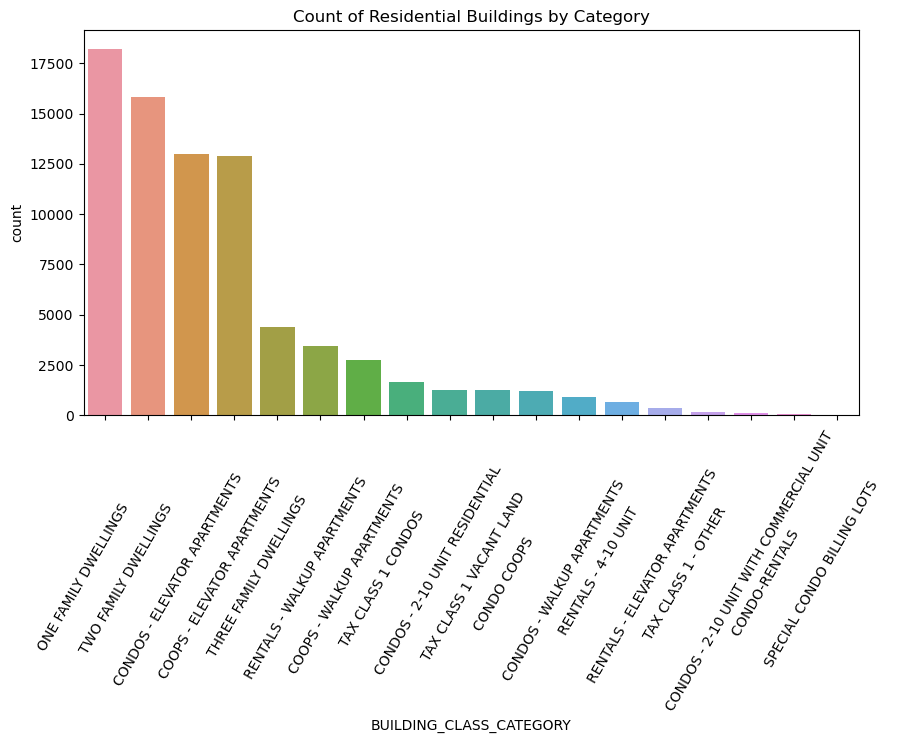

In [5]:
data['BUILDING_CLASS_CATEGORY'] = data['BUILDING_CLASS_CATEGORY'].str[3:]

residential_data = data.loc[data['TAX_CLASS_AT_TIME_OF_SALE'].isin([1,2,'1A','1B','1C','2A','2B','2C'])]

plt.figure(figsize=(10,5))

chart = sns.countplot(data=residential_data, x='BUILDING_CLASS_CATEGORY', order=residential_data['BUILDING_CLASS_CATEGORY'].value_counts().index)

chart.set_xticklabels(chart.get_xticklabels(), rotation=60)

plt.title('Count of Residential Buildings by Category')
  
plt.show()


This gives us a lot of good information. It seems like most properties are family dwellings. This is probably because most boroughs, besides Manhattan, actually have more houses.

We also see there is some vacant land that is set aside for residential use, but no building exists yet. Since my analysis is focusing on the sale of individual apartments, we can remove these records. 

We also see variables that could be of use to us, like Family Dwelling vs. COOP vs. CONDO vs. Rental.These probably have different sales values. 

Also we can add a binary variable for no-elevator vs. elevator. Elevator buildings are generally more desireable and exist more frequently in Manhattan, the most expensive borough. 

In [6]:
# remove vacant land
residential_data = residential_data[residential_data["BUILDING_CLASS_CATEGORY"].str.contains("COMMERCIAL VACANT LAND") == False]
residential_data = residential_data[residential_data["BUILDING_CLASS_CATEGORY"].str.contains("TAX CLASS 1 VACANT LAND") == False]

In [7]:
# add binary variable for no-elevator (0) vs. elevator (1)
residential_data['ELEVATOR'] = np.where(residential_data['BUILDING_CLASS_CATEGORY'].str.contains("ELEVATOR"), 1, 0)

In [8]:
# add variable for consolidated building class category
conditions = [
    (residential_data['BUILDING_CLASS_CATEGORY'].str.contains("DWELLINGS")),
    (residential_data['BUILDING_CLASS_CATEGORY'].str.contains("CONDO")),
    (residential_data['BUILDING_CLASS_CATEGORY'].str.contains("COOPS")),
    (residential_data['BUILDING_CLASS_CATEGORY'].str.contains("RENTALS")),
    (residential_data['BUILDING_CLASS_CATEGORY'].str.contains("OTHER")),
]

values = ['family_home', 'condo', 'coop', 'rental','other']


residential_data['CONSOLIDATED_BUILDING_CLASS_CATEGORY'] = np.select(conditions, values)
# residential_data = residential_data.drop('BUILDING CLASS CATEGORY', axis=1)

<Figure size 1500x500 with 0 Axes>

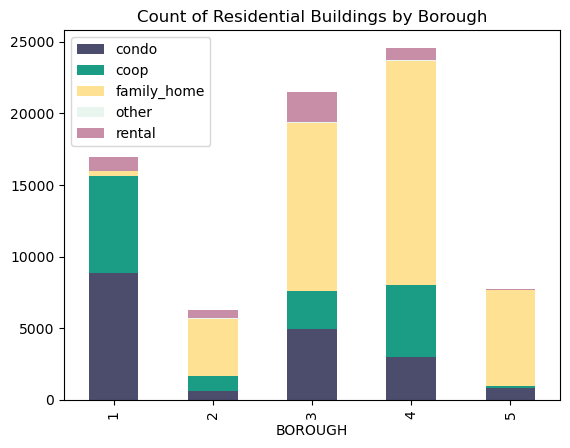

In [9]:
plt.figure(figsize=(15,5))

df_plot = residential_data.groupby(['BOROUGH', 'CONSOLIDATED_BUILDING_CLASS_CATEGORY']).size().reset_index().pivot(columns='CONSOLIDATED_BUILDING_CLASS_CATEGORY', index='BOROUGH', values=0)

df_plot.plot(kind='bar', stacked=True, color=["#4C4C6D","#1B9C85","#FFE194","#E8F6EF","#C88EA7"])

plt.title('Count of Residential Buildings by Borough')

plt.legend(loc='best')
  
plt.show()

From the above figure, we see that Manhattan has mostly condos and coops, whereas all other boroughs are primarily family homes. We also see that Brooklyn and Queens have the most property sales. Brooklyn and Staten Island have fewer sales. 

Since the mix of home types is so different across the different boroughs, it makes sense to take borough into account when we estimate some missing values in the next section.

For reference: 1:Manhattan, 2:Bronx, 3:Brooklyn, 4:Queens, 5:Staten Island 

### <font color='1C315E'>Estimating Missing Values: residential units, year,  square feet, & sales price</font>

The above information can help us to estimate missing values in the # of units, year built, and sales price columns. 

#### <font color='1C315E'>Estimating Residential units</font>

First, let's see how many values are missing in Residential Units columns. 

In [10]:
print(f"Residential units which are null: {residential_data['RESIDENTIAL_UNITS'].isna().sum()}")
print(f"Rental Units which are 0: {len(residential_data[residential_data['RESIDENTIAL_UNITS']==0])}")

Residential units which are null: 0
Rental Units which are 0: 17659


Because of the sheer number of single/multi-family dwellings, we need to group by borogh and building class category to get a more realistic estimation for the missing residential unit values:

In [11]:
res_units_borough = residential_data[['BOROUGH','RESIDENTIAL_UNITS','CONSOLIDATED_BUILDING_CLASS_CATEGORY']]

res_units_borough = res_units_borough[res_units_borough["RESIDENTIAL_UNITS"] != 0]

result_mean = res_units_borough.groupby(['BOROUGH', 'CONSOLIDATED_BUILDING_CLASS_CATEGORY'])['RESIDENTIAL_UNITS'].mean()
print("Median Residential Units By BOROUGH & Building Class:\n",result_mean)


Median Residential Units By BOROUGH & Building Class:
 BOROUGH  CONSOLIDATED_BUILDING_CLASS_CATEGORY
1        condo                                     1.070747
         coop                                    181.700000
         family_home                               1.846608
         rental                                   30.046218
2        condo                                     1.000000
         coop                                    157.000000
         family_home                               1.848243
         rental                                   26.683566
3        condo                                     1.290893
         coop                                    113.750000
         family_home                               1.887608
         other                                     1.076923
         rental                                    9.147781
4        condo                                     1.326439
         coop                                    294.642857

Let's replace records which have 0 residential units with the average number of units by borough, by building category. 

In [12]:
residential_units_dict = { 
    1: {'condo': 1, 'coop': 182, 'family_home':2, 'rental':30, 'other':0},
    2: {'condo': 1, 'coop': 157, 'family_home':2, 'rental':26, 'other':0},
    3: {'condo': 1, 'coop': 114, 'family_home':2, 'rental':9, 'other':1},
    4: {'condo': 1, 'coop': 295, 'family_home':2, 'rental':11, 'other':1},
    5: {'condo': 1, 'coop': 102, 'family_home':1, 'rental':8, 'other':1},
                         }

types = ['condo','coop','family_home','rental','other']

for borough_number in range(1,6):
    for building_class in range(len(types)):
        #print(residential_units_dict[borough_number][types[building_class]])
        residential_data['RESIDENTIAL_UNITS'] = np.where(
           (residential_data['RESIDENTIAL_UNITS'] ==0) 
            & (residential_data['BOROUGH'] == borough_number) 
            & (residential_data['CONSOLIDATED_BUILDING_CLASS_CATEGORY'] == types[building_class-1])
            ,residential_units_dict[borough_number][types[building_class]]
            , residential_data['RESIDENTIAL_UNITS']
           )

In [13]:
print(f"Residential units which are null: {residential_data['RESIDENTIAL_UNITS'].isna().sum()}")
print(f"Rental Units which are 0: {len(residential_data[residential_data['RESIDENTIAL_UNITS']==0])}")

Residential units which are null: 0
Rental Units which are 0: 0


No more null values!

#### <font color='1C315E'>Estimating Missing Values: Year</font>

Now, let's see how many values are missing in the Year Built column: 

In [14]:
print(f"Residential units which are null: {residential_data['RESIDENTIAL_UNITS'].isna().sum()}")
print(f"Year Built which is 0: {len(residential_data[residential_data['YEAR_BUILT']==0])}")

Residential units which are null: 0
Year Built which is 0: 4274


In [15]:
year_borough = residential_data[['BOROUGH',"YEAR_BUILT"]]

year_borough = year_borough[year_borough["YEAR_BUILT"] != 0]

result = year_borough.groupby('BOROUGH')['YEAR_BUILT'].median()
print("Median Year Build By BOROUGH:\n",result)

result_mean = year_borough.groupby('BOROUGH')['YEAR_BUILT'].mean()
print("Mean Year Build By BOROUGH:\n",result_mean)

Median Year Build By BOROUGH:
 BOROUGH
1    1955.0
2    1940.0
3    1930.0
4    1945.0
5    1975.0
Name: YEAR_BUILT, dtype: float64
Mean Year Build By BOROUGH:
 BOROUGH
1    1951.836393
2    1944.313546
3    1941.876902
4    1947.961461
5    1969.136635
Name: YEAR_BUILT, dtype: float64


We have 4,274 rows where the YEAR BUILT is 0. 

For the rows that are non-zero, we can see the average build year by borough. Taking the mean skews the values becaue there are some *very old* buildings in NYC. There's 54 properties before 1850. 

Therefore, we will replace the zero values with their borough's **median** build year, 

In [16]:
median_year = [1955,1940,1930,1945,1975]

for borough_number in range(1,6):
    residential_data['YEAR_BUILT'] = np.where(
           (residential_data['YEAR_BUILT'] ==0), median_year[borough_number-1], residential_data['YEAR_BUILT']
           )

In [17]:
print(f"Year built which are null: {residential_data['YEAR_BUILT'].isna().sum()}")
print(f"Year Built which is 0: {len(residential_data[residential_data['YEAR_BUILT']==0])}")

Year built which are null: 0
Year Built which is 0: 0


#### <font color='1C315E'>Estimating Missing Values: Square Feet </font>

In [18]:
year_squarefeet = residential_data[['BOROUGH','CONSOLIDATED_BUILDING_CLASS_CATEGORY',"LAND_SQUARE_FEET"]]

year_squarefeet = year_squarefeet[year_squarefeet["LAND_SQUARE_FEET"] != 0]

year_squarefeet

result_median = year_squarefeet.groupby(['BOROUGH', 'CONSOLIDATED_BUILDING_CLASS_CATEGORY'])['LAND_SQUARE_FEET'].median()
print("Median Land Square Feet By BOROUGH & Building Class:\n",result_median)

Median Land Square Feet By BOROUGH & Building Class:
 BOROUGH  CONSOLIDATED_BUILDING_CLASS_CATEGORY
1        condo                                    6867.5
         coop                                     9581.5
         family_home                              1794.0
         rental                                   2510.0
2        coop                                    43750.0
         family_home                              2500.0
         other                                    2500.0
         rental                                   3125.0
3        condo                                   18175.0
         coop                                    17875.0
         family_home                              2000.0
         other                                    2000.0
         rental                                   2500.0
4        condo                                   54852.0
         coop                                    76000.0
         family_home                         

In [19]:
land_square_feet_dict = { 
    1: {'condo': 6867.5, 'coop': 8963.0, 'family_home':1794.0, 'rental':2510.0, 'other':0},
    2: {'condo': 0, 'coop': 43750.0, 'family_home':2500.0, 'rental':3125.0, 'other':0},
    3: {'condo': 18175.0, 'coop':  17875.0, 'family_home':2000.0, 'rental':2600.0, 'other':2000.0},
    4: {'condo': 54852.0, 'coop': 75461.5, 'family_home': 2774.0, 'rental': 2600.0, 'other':2003.5},
    5: {'condo': 0, 'coop': 95257.5, 'family_home':3549.5, 'rental':5500.0, 'other':3980.0},
                         }

types = ['condo','coop','family_home','rental','other']

for borough_number in range(1,6):
    for building_class in range(len(types)):
        #print(residential_units_dict[borough_number][types[building_class]])
        residential_data['LAND_SQUARE_FEET'] = np.where(
           (residential_data['LAND_SQUARE_FEET'] ==0) 
            & (residential_data['BOROUGH'] == borough_number) 
            & (residential_data['CONSOLIDATED_BUILDING_CLASS_CATEGORY'] == types[building_class-1])
            ,residential_units_dict[borough_number][types[building_class]]
            , residential_data['LAND_SQUARE_FEET']
           )

In [20]:
print(f"Land Sqaure feet which are null: {residential_data['LAND_SQUARE_FEET'].isna().sum()}")
print(f"Land Square which is 0: {len(residential_data[residential_data['LAND_SQUARE_FEET']==0])}")

Land Sqaure feet which are null: 0
Land Square which is 0: 0


Take the same approach for gross sqaure feet: 

In [21]:
print(f"Land Sqaure feet which are null: {residential_data['GROSS_SQUARE_FEET'].isna().sum()}")
print(f"Land Square which is 0: {len(residential_data[residential_data['GROSS_SQUARE_FEET']==0])}")

Land Sqaure feet which are null: 0
Land Square which is 0: 34129


In [22]:
year_grossfeet = residential_data[['BOROUGH','CONSOLIDATED_BUILDING_CLASS_CATEGORY',"GROSS_SQUARE_FEET"]]

year_grossfeet = year_grossfeet[year_grossfeet["GROSS_SQUARE_FEET"] != 0]

year_grossfeet

result_median = year_grossfeet.groupby(['BOROUGH', 'CONSOLIDATED_BUILDING_CLASS_CATEGORY'])['GROSS_SQUARE_FEET'].median()
print("Median Gross Square Feet By BOROUGH & Building Class:\n",result_median)

Median Gross Square Feet By BOROUGH & Building Class:
 BOROUGH  CONSOLIDATED_BUILDING_CLASS_CATEGORY
1        condo                                    35021.0
         coop                                     64179.5
         family_home                               3600.0
         rental                                    9430.0
2        coop                                     77760.0
         family_home                               2048.0
         other                                      450.0
         rental                                    6910.0
3        condo                                    70775.0
         coop                                     81709.0
         family_home                               2132.0
         other                                      304.0
         rental                                    4500.0
4        condo                                    33770.0
         coop                                    131064.5
         family_home         

In [23]:
land_gross_feet_dict = { 
    1: {'condo': 35021, 'coop': 64179, 'family_home':3600, 'rental':9412, 'other':0},
    2: {'condo': 0, 'coop': 77760, 'family_home':2048, 'rental':6910, 'other':450},
    3: {'condo': 70775, 'coop':  81709, 'family_home':2132, 'rental':4500, 'other':304},
    4: {'condo': 33770, 'coop': 131064, 'family_home': 1626, 'rental': 4090, 'other':390},
    5: {'condo': 0, 'coop': 82200, 'family_home':1552, 'rental':3730, 'other':642},
                         }

types = ['condo','coop','family_home','rental','other']

for borough_number in range(1,6):
    for building_class in range(len(types)):
        #print(residential_units_dict[borough_number][types[building_class]])
        residential_data['GROSS_SQUARE_FEET'] = np.where(
           (residential_data['GROSS_SQUARE_FEET'] ==0) 
            & (residential_data['BOROUGH'] == borough_number) 
            & (residential_data['CONSOLIDATED_BUILDING_CLASS_CATEGORY'] == types[building_class-1])
            ,residential_units_dict[borough_number][types[building_class]]
            , residential_data['GROSS_SQUARE_FEET']
           )

In [24]:
print(f"Land Sqaure feet which are null: {residential_data['GROSS_SQUARE_FEET'].isna().sum()}")
print(f"Land Square which is 0: {len(residential_data[residential_data['GROSS_SQUARE_FEET']==0])}")

Land Sqaure feet which are null: 0
Land Square which is 0: 11


#### <font color='1C315E'>Estimating Missing Values: Sales Price</font>

Now, let's complete this data cleaning by estimating sales price for the missing values. We know that if it was blank or zero it was most likely because due to a transfer of a deed. However, these are still valueable data points we want to use in our model. So let's estimate them.

In [25]:
print(f"Sales Price which are null: {residential_data['SALE_PRICE'].isna().sum()}")
print(f"Sales Price which is 0: {len(residential_data[residential_data['SALE_PRICE']==0])}")

Sales Price which are null: 0
Sales Price which is 0: 20414


In [26]:
sales_price_borough = residential_data[['BOROUGH','SALE_PRICE','CONSOLIDATED_BUILDING_CLASS_CATEGORY']]

sales_price_borough = sales_price_borough[sales_price_borough["SALE_PRICE"] != 0]

print(f"Price Mean: {sales_price_borough['SALE_PRICE'].mean()}")
print(f"Price Max: {sales_price_borough['SALE_PRICE'].max()}")
print(f"Price Median: {sales_price_borough['SALE_PRICE'].median()}")

Price Mean: 1182880.3188331537
Price Max: 620000000
Price Median: 625000.0


Before we can estimate sales prices, there are some extreme outliers we need to remove. First, according to <a href="https://www.nbcnews.com/news/us-news/new-york-city-condo-sold-u-s-record-238-million-n962346"> this </a> NBC article from 2019, paid a U.S.-record 238 million for a penthouse condominium overlooking Manhattan's Central Park. Therefore, anything in our data set (which is 2016-2017 data) above this price is invalid and is probably the sale of the entire building, not a single apartment. After spotchecking the data this makes sense because anything at these high price points the apartment number column is blank. The highest price in our dataset where the apartment number appears is 217,500,000. Therefore, we can for sure remove anything greater than this. However, I think given the mean price is 1.18 million, and given my own apartment searching, I think anything greater than $5,000,000 is not accessible to the normal population. In order to estimate missing prices, I will remove anything greater than 5M. 

In [27]:
# remove values where sales price is more than 5 million
sales_price_borough = sales_price_borough[sales_price_borough["SALE_PRICE"] < 5000000]
residential_data = residential_data[residential_data["SALE_PRICE"] < 5000000]

On the opposite side, we have a around ~10,000 records which were sold for less than 100,000. Some of them look to be a symbolic value (like 1 or 10) - similar to how celebrities go to court for the value of a dollar. For these we will reestimate the values. 

The values which are between 10,000 and 100,000 are more troublesome. After browsing some housing sites, I couldn't find anything available for purchase less than 50,000 (although I did find a parking space in NJ for 25,000!). 

So, anything less than 50,000 I'm going to assume is an apartment that was more or less "gifted" to a friend or family member and I will re-esimtate those prices. Everything else between 50,000 and 100,000 I am skeptical, but I cannot rule out that these are not market value prices (especially in areas of Queens, the Bronx, and Staten Island). Therefore, values in this range I will leave as is. 

In [28]:
# remove any data less than $50,000 
sales_price_borough = sales_price_borough[sales_price_borough["SALE_PRICE"] >= 50000]
# and convert it to a 0 in the residential data file to re-esimate. 
residential_data['SALE_PRICE'] = np.where(
       (residential_data['SALE_PRICE'] <=50000), 0, residential_data['SALE_PRICE']
       )

Now that'd we've removed clear outliers, we need to determine what is the best measure of central tendency to estimate the sales price for rows with a 0 value. 

However, that is very tricky in NYC where certain neighborhoods are very desirable and there is such a large range of sales prices. 

<AxesSubplot:title={'center':'Mean Sales Price by Neighborhood'}, xlabel='code', ylabel='SALE_PRICE'>

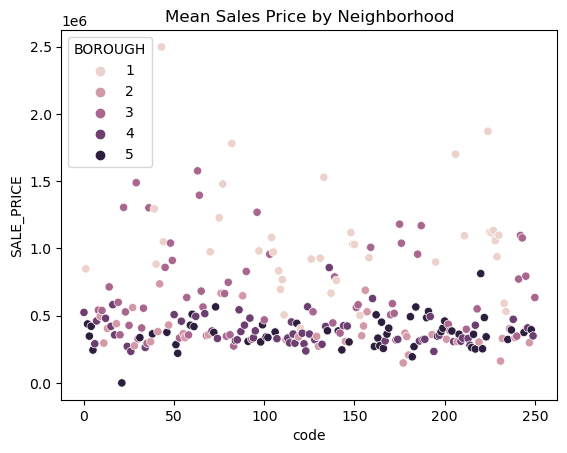

In [29]:
neighborhood_price = residential_data[['NEIGHBORHOOD','SALE_PRICE','BOROUGH']]

mean_price_neighborhood = neighborhood_price.groupby(['NEIGHBORHOOD','BOROUGH'],as_index=False)['SALE_PRICE'].mean()


mean_price_neighborhood.NEIGHBORHOOD = pd.Categorical(mean_price_neighborhood.NEIGHBORHOOD)

plt.title("Mean Sales Price by Neighborhood")

mean_price_neighborhood['code'] = mean_price_neighborhood.NEIGHBORHOOD.cat.codes
sns.scatterplot(x=mean_price_neighborhood['code'],y=mean_price_neighborhood['SALE_PRICE'], hue='BOROUGH', data=mean_price_neighborhood, markers = True
            )

It appears Brooklyn and Manhattan neighborhoods are driving the higher sales prices. Given this highly skewed dataset, the best measure of central tendency for the missing values is the median. However, we need to keep in mind the high impact of borough/neigborhood could have on our model. 

Now I'm curious which neighborhoods are driving these high prices. 

Text(0.5, 1.0, 'Mean Sales Price by Neighborhood')

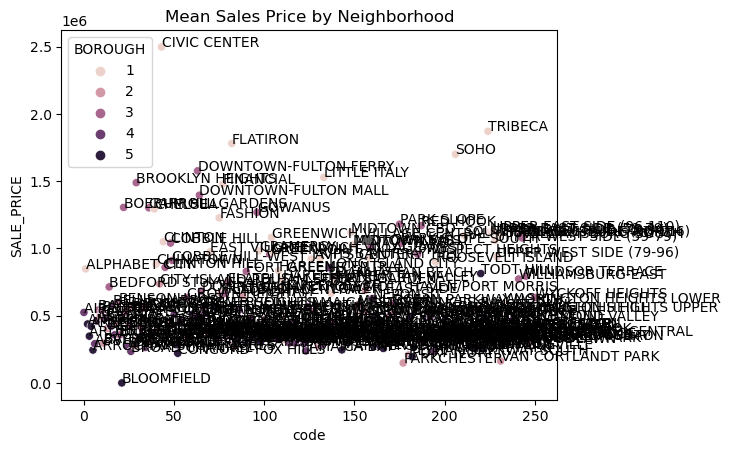

In [30]:
neighborhoods = mean_price_neighborhood['NEIGHBORHOOD']
price = mean_price_neighborhood['SALE_PRICE']

sns.scatterplot(x=mean_price_neighborhood['code'],y=mean_price_neighborhood['SALE_PRICE'], hue='BOROUGH', data=mean_price_neighborhood, markers = True
            )

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(mean_price_neighborhood.code, mean_price_neighborhood.SALE_PRICE, mean_price_neighborhood.NEIGHBORHOOD, plt.gca())  

plt.title("Mean Sales Price by Neighborhood")

SOHO, Flatiron, and Tribeca are super popular and trendy places to live, so this makes sense. 

But the Civic Center isn't really known as a residential area. Per Wikipedia, "neighborhood that encompasses New York City Hall, One Police Plaza, the courthouses in Foley Square, the Metropolitan Correctional Center". Even though its more governmental buildings it has really high prices. 

I got curious and checked a few of the addresses in the raw data file. And I mean, look at this place: 

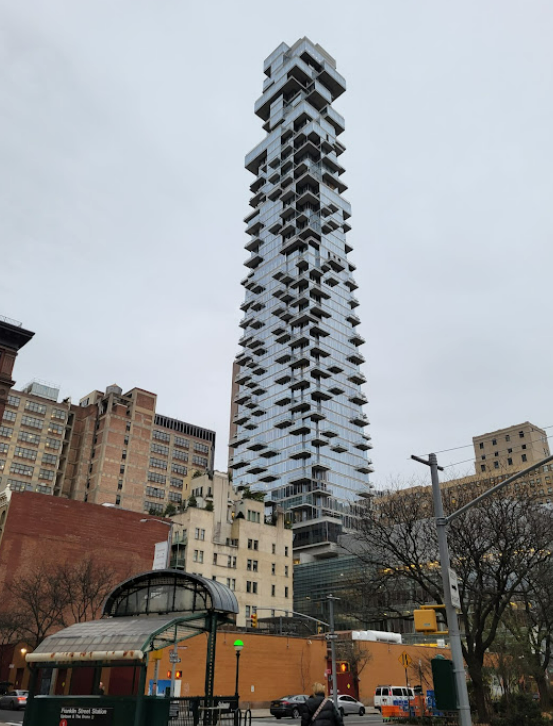

Given the neighborhood's reputation and outlier values, I'm going to remove this neighborhood from my analysis. 


In [31]:
residential_data = residential_data[residential_data["NEIGHBORHOOD"].str.contains("CIVIC CENTER") == False]

In [32]:
result_median = sales_price_borough.groupby(['BOROUGH'])['SALE_PRICE'].median()
print("Median Residential Units By BOROUGH & Building Class:\n",result_median)

Median Residential Units By BOROUGH & Building Class:
 BOROUGH
1    995000.0
2    400000.0
3    770000.0
4    499000.0
5    470000.0
Name: SALE_PRICE, dtype: float64


In [33]:
median = [1160000,400000,775000,499000,470000]

for borough_number in range(1,6):
    residential_data['SALE_PRICE'] = np.where(
       (residential_data['SALE_PRICE'] ==0) & (residential_data['BOROUGH'] == borough_number) , median[borough_number-1], residential_data['SALE_PRICE']
       )

In [34]:
print(f"Sales Price which are null: {residential_data['SALE_PRICE'].isna().sum()}")
print(f"Sales Price which is 0: {len(residential_data[residential_data['SALE_PRICE']==0])}")

Sales Price which are null: 0
Sales Price which is 0: 0


Text(0.5, 1.0, 'Sale Price Log')

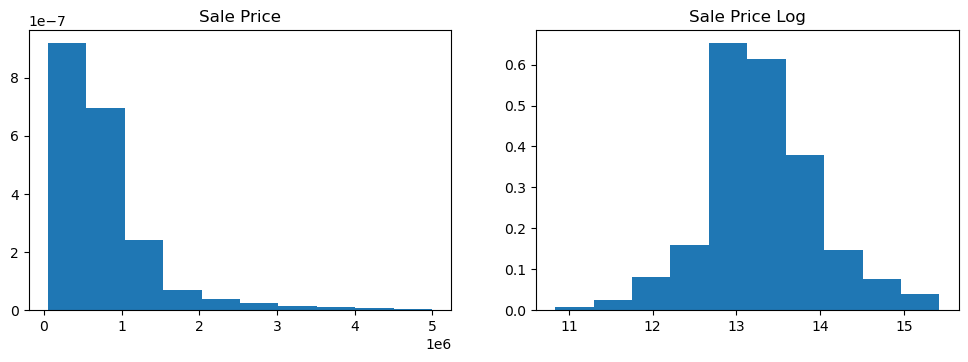

In [35]:
plt.figure(figsize = (12,8))
plt.subplot(2,2,1)
plt.hist(residential_data["SALE_PRICE"], density = True)
plt.title("Sale Price")
plt.subplot(2,2,2)
plt.hist(np.log1p(residential_data["SALE_PRICE"]), density = True)
plt.title("Sale Price Log")

After removing outliers (greater than 5M) and re-estimating any record that had a sales price from 0 to $50,000, we can see in the graphs above two things: 

1. The sales price is still highly right skewed. However, given NYC is known for expensive properties, this is to be expected. I think removing any more extreme values would over simplify the model.  
2. The log of sales price appears normal, which is what we want and can be used as the target variable in our model. 

### <font color='1C315E'>Format Date Column</font>

Now that all the missing values are estimated, I want to format the date column. Since its only a year's worth of data, year doesn't help us much. Instead, we can try to see if seasonality has any effect. Let's create a column for 'season'. 

In [36]:
residential_data['SALE_MONTH'] = pd.DatetimeIndex(residential_data['SALE_DATE']).month

### <font color='1C315E'>Last Few Adjustments</font>

In the NYC documentation, tax class is only defined as 1,2,3 or 4. In the data, we see things like 1A, 2B, etc. I will convert everything to 1,2,3, or 4 for simplicity. 

In [37]:
residential_data['TAX_CLASS_AT_PRESENT'] = np.where(
   (residential_data['TAX_CLASS_AT_PRESENT'].isin(['1A','1B','1C'])), 1, residential_data['TAX_CLASS_AT_PRESENT']
   )

residential_data['TAX_CLASS_AT_PRESENT'] = np.where(
   (residential_data['TAX_CLASS_AT_PRESENT'].isin(['2A','2B','2C'])), 2, residential_data['TAX_CLASS_AT_PRESENT']
   )

After reading through the Building Class Codes in the <a href="https://www.nyc.gov/assets/finance/jump/hlpbldgcode.html#:~:text=Building%20Classification%20%7C%20City%20of%20New%20York%20,PERMANENT%20LIVING%20QUARTER%20%2061%20more%20rows%20"> NYC documentation </a>, there are still a few rows which need to be removed based on the scope of my analysis, namely: 

- G0: GARAGE; RESIDENTIAL TAX CLASS 1
- G7: UNLICENSED PARKING LOT
- V0: ZONED RESIDENTIAL; NOT MANHATTAN
- V1: ZONED COMMERCIAL OR MANHATTAN RESIDENTIAL
- Z0: TENNIS COURT, POOL, SHED, ETC.

In [38]:
residential_data.drop(residential_data[residential_data['BUILDING_CLASS_AT_PRESENT'].isin(['G0','G7','V0','V1','Z0'])].index, inplace = True)

In [39]:
residential_data.to_csv('residential_data.csv')

In [40]:
print(f"Null Values: {residential_data.isna().sum()}")

Null Values: BOROUGH                                 0
NEIGHBORHOOD                            0
BUILDING_CLASS_CATEGORY                 0
TAX_CLASS_AT_PRESENT                    0
BUILDING_CLASS_AT_PRESENT               0
ZIP_CODE                                0
RESIDENTIAL_UNITS                       0
COMMERCIAL_UNITS                        0
TOTAL_UNITS                             0
LAND_SQUARE_FEET                        0
GROSS_SQUARE_FEET                       0
YEAR_BUILT                              0
TAX_CLASS_AT_TIME_OF_SALE               0
BUILDING_CLASS_AT_TIME_OF_SALE          0
SALE_PRICE                              0
SALE_DATE                               0
ELEVATOR                                0
CONSOLIDATED_BUILDING_CLASS_CATEGORY    0
SALE_MONTH                              0
dtype: int64


### <font color='1C315E'>Correlation Heat Map</font>

In [41]:
# codify building class into numbers
conditions = [
    (residential_data['BUILDING_CLASS_AT_PRESENT'].str.contains("family_home")),
    (residential_data['BUILDING_CLASS_AT_PRESENT'].str.contains("condo")),
    (residential_data['BUILDING_CLASS_AT_PRESENT'].str.contains("coop")),
    (residential_data['BUILDING_CLASS_AT_PRESENT'].str.contains("rental")),
    (residential_data['BUILDING_CLASS_AT_PRESENT'].str.contains("other")),
]

values = [0,1,2,3,4]


residential_data['CODED_CLASS'] = np.select(conditions, values)


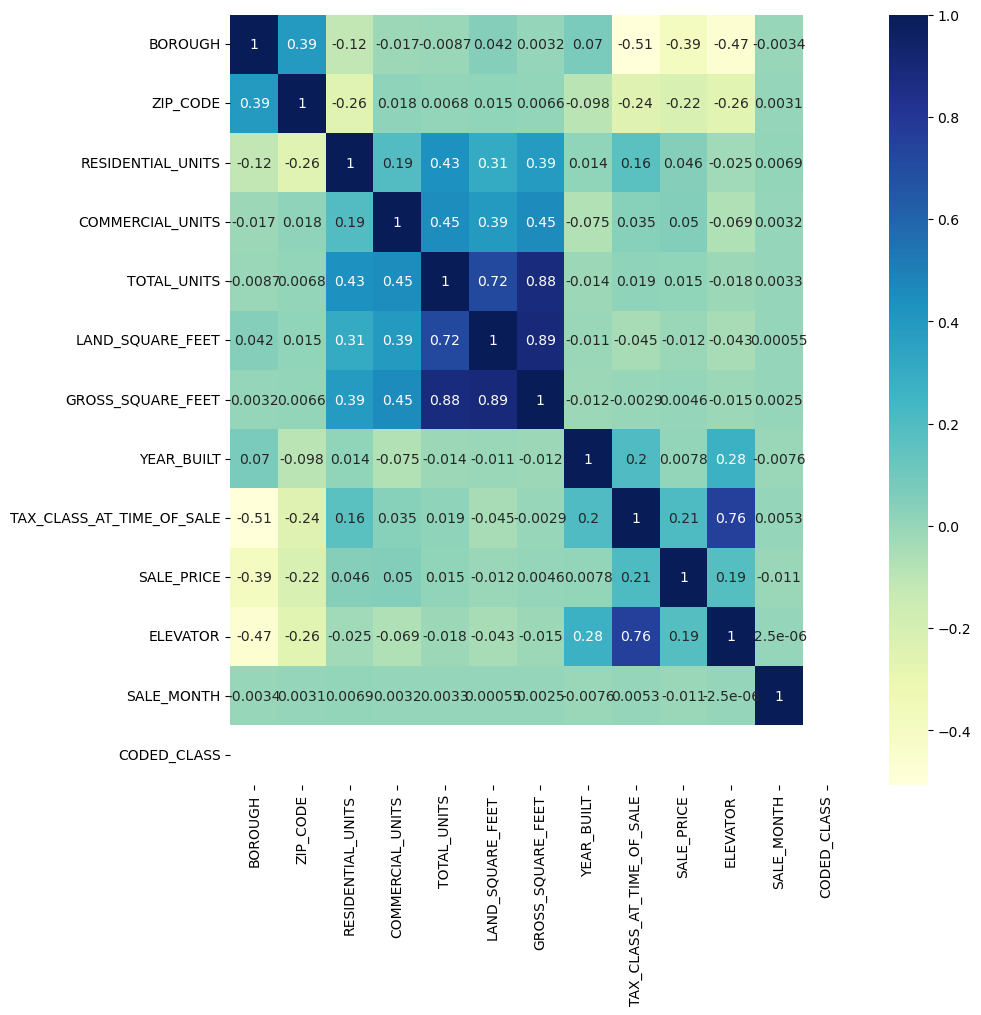

In [42]:
corr = residential_data.corr()

plt.figure(figsize=(10, 10))
dataplot = sns.heatmap(corr, annot=True, cmap="YlGnBu",)

plt.show()

It looks like gross square feet is closely correlated with total units and land square feet. We should take note of this in order to avoid multicollinearity.

We also see that sales price is positively correlatd with commerical units, total units, gross suare feet, tax class, and elevator. 

Sales price is negatively correlated with borough and zip code. 

## <font color='1C315E'> Logistic Regression</font>

In [43]:
# using stats models
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import RobustScaler
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

Since sale price is heavily right skewed, we need to take the log of our target variable (SALE PRICE) to reduce the skewness in the data. 

In [44]:
# take log of sale price 
residential_data["ln_sale_price"] = np.log(residential_data['SALE_PRICE'])

In [45]:
residential_data.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BUILDING_CLASS_AT_PRESENT', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE', 'ELEVATOR',
       'CONSOLIDATED_BUILDING_CLASS_CATEGORY', 'SALE_MONTH', 'CODED_CLASS',
       'ln_sale_price'],
      dtype='object')

In [46]:
# using stats models
model = smf.ols("ln_sale_price ~  C(BOROUGH) + C(CODED_CLASS) + C(TAX_CLASS_AT_TIME_OF_SALE)+ RESIDENTIAL_UNITS + COMMERCIAL_UNITS + TOTAL_UNITS + LAND_SQUARE_FEET + GROSS_SQUARE_FEET + YEAR_BUILT + ELEVATOR + SALE_MONTH",
                data = residential_data)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:          ln_sale_price   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     2719.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        13:05:01   Log-Likelihood:                -61793.
No. Observations:               74837   AIC:                         1.236e+05
Df Residuals:                   74823   BIC:                         1.237e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

We see that the basic logistic model does not perform very well, only 32% of the variability in price can be explained. On a positive note, most of our variables are statistically significant. 

Only SALE MONTH has a p value above 0.007. Perhaps seasonality is not a factor in SALE PRICE, the box plot seems to show that property sales are unaffected by seasonality. 

This is surprising to me, because in the renter's market in NYC, summer rental prices are much higher than in the winter. However, renters, as a demand group, are much more in flux than people who own an apartment. Perhaps I attributed more value to SALE MONTH because of my own bias in the renters market. 

The below boxplot confirms seasonility is not really a factor. 


<AxesSubplot:title={'center':'Seasonality'}, xlabel='SALE_MONTH', ylabel='ln_sale_price'>

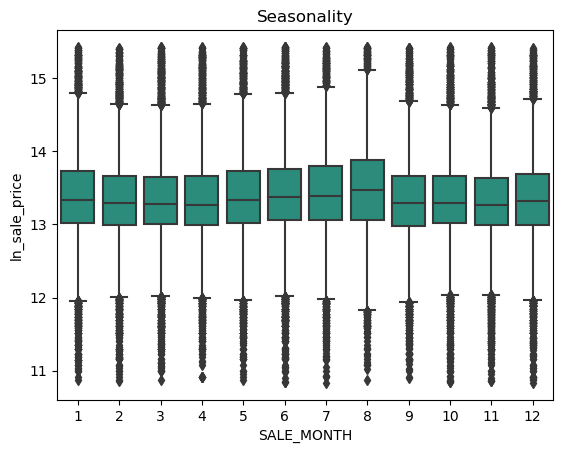

In [47]:
plt.title('Seasonality')
sns.boxplot(x='SALE_MONTH', y='ln_sale_price', data=residential_data, color='#1B9C85')

Fitted vaules look somewhat random and distribution of residuals look normal

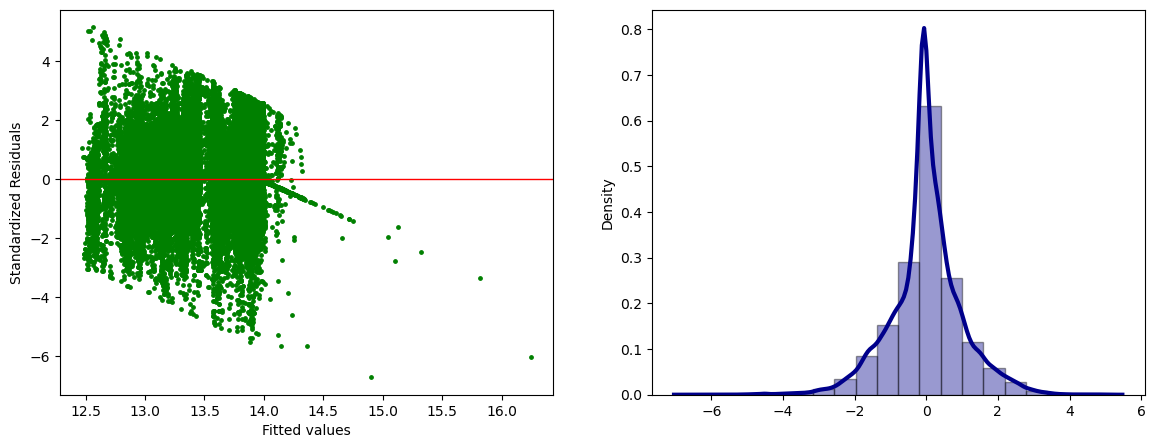

In [48]:
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.scatter(fitted.fittedvalues, fitted.resid_pearson, color='green', s=6)
plt.axhline(y=0, c='r', lw=1)
plt.xlabel('Fitted values') ; plt.ylabel('Standardized Residuals')
plt.subplot(122)
sns.distplot(fitted.resid_pearson, hist=True, kde=True, bins=20, 
             color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 3})
plt.show()

Aside from removing the unnecessary SALE MONTH feature, how can we improve the model? 

###  <font color='1C315E'> Multicollinearity</font>

Now, let's run VIF (variance inflation factors). Variance Inflation Factors (VIFs) measure the correlation among independent variables in least squares regression models. Statisticians refer to this type of correlation as multicollinearity. Excessive multicollinearity can cause problems for regression models.

A value of 1 means no collinearity. Anything less than 5 is OK. <a href='https://statisticsbyjim.com/regression/variance-inflation-factors/'>Source</a>

In [49]:
# continuous variables
Y, X = dmatrices("ln_sale_price ~ RESIDENTIAL_UNITS + COMMERCIAL_UNITS + TOTAL_UNITS + LAND_SQUARE_FEET + GROSS_SQUARE_FEET + YEAR_BUILT + TAX_CLASS_AT_TIME_OF_SALE + ELEVATOR", data = residential_data, return_type = "dataframe")
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
df_vif=vif.iloc[1:] #remove the row for intercept 
df_vif.round(2)

,VIF Factor,features
1,1.35,RESIDENTIAL_UNITS
2,1.32,COMMERCIAL_UNITS
3,5.40,TOTAL_UNITS
4,5.73,LAND_SQUARE_FEET
5,12.59,GROSS_SQUARE_FEET
6,1.09,YEAR_BUILT
7,2.62,TAX_CLASS_AT_TIME_OF_SALE
8,2.63,ELEVATOR


It looks like some variables are correlated with one another. 

1. Obviously, Total Units is mostly a sum of commercial and residential units. Also probably a factor of the land square feet and gross square feet. 


2. Gross square feet is also very high. It's probably some linear combination of the number of units plus the land square feet.


3. We also saw from our correlation map that tax class and elevator is highly correlated. This stems from the tax class definitions. By their definitions, Class 1 is not likely to have an elevator but Class 2 is: 

    • Class 1: Includes most residential property of up to three units (such as one-, 
    two-, and three-family homes and small stores or offices with one or two 
    attached apartments), vacant land that is zoned for residential use, and most 
    condominiums that are not more than three stories. 
    
    • Class 2: Includes all other property that is primarily residential, such as 
    cooperatives and condominiums.
    

One way to deal with this is to try some linear combination of these correlated features and put them into one feature. 

In [76]:
residential_data["LAND_GROSS"] = np.log(residential_data['LAND_SQUARE_FEET'] + residential_data['GROSS_SQUARE_FEET'])
residential_data["UNITS"] = residential_data['COMMERCIAL_UNITS'] + residential_data['RESIDENTIAL_UNITS']
residential_data["UNITS_SQUARE_FEET"] = np.log(residential_data['LAND_GROSS'] + residential_data['UNITS'])

In [59]:
# using stats models
model = smf.ols("ln_sale_price ~  C(BOROUGH) + C(CODED_CLASS) + C(TAX_CLASS_AT_TIME_OF_SALE)+ YEAR_BUILT +  ELEVATOR + UNITS",
                data = residential_data)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:          ln_sale_price   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     4337.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        13:07:56   Log-Likelihood:                -62015.
No. Observations:               74837   AIC:                         1.240e+05
Df Residuals:                   74828   BIC:                         1.241e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

After playing with some linear combinations of the continuous features, we don't sacrifice much explainability, but we reduce the dimensionality of the model. Also, multicollinearity reduced from  2.04e+06 to 1.28e+05.

Let's see if we can get any improvement by looking at the categorical variables.

In [52]:
# categorical variables
Y, X = dmatrices("ln_sale_price ~ C(BOROUGH) + C(CODED_CLASS) + C(TAX_CLASS_AT_TIME_OF_SALE)", data = residential_data, return_type = "dataframe")
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
df_vif=vif.iloc[1:] #remove the row for intercept 
df_vif.round(2)


#    (residential_data['CONSOLIDATED BUILDING CLASS CATEGORY'].str.contains("family_home")),
#     (residential_data['CONSOLIDATED BUILDING CLASS CATEGORY'].str.contains("condo")),
#     (residential_data['CONSOLIDATED BUILDING CLASS CATEGORY'].str.contains("coop")),
#     (residential_data['CONSOLIDATED BUILDING CLASS CATEGORY'].str.contains("rental")),
#     (residential_data['CONSOLIDATED BUILDING CLASS CATEGORY'].str.contains("other")),
# ]

# values = [0,1,2,3,4]


,VIF Factor,features
1,1.48,C(BOROUGH)[T.2]
2,2.09,C(BOROUGH)[T.3]
3,2.28,C(BOROUGH)[T.4]
4,1.81,C(BOROUGH)[T.5]
5,1.46,C(TAX_CLASS_AT_TIME_OF_SALE)[T.2]


In [88]:
# using stats models
model = smf.ols("ln_sale_price ~  C(BOROUGH) + C(CODED_CLASS) + YEAR_BUILT +  ELEVATOR + LAND_GROSS + UNITS ",
                data = residential_data)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:          ln_sale_price   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     6763.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        19:15:30   Log-Likelihood:                -55909.
No. Observations:               74837   AIC:                         1.118e+05
Df Residuals:                   74828   BIC:                         1.119e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          11.3894      0.122     

By combining the features, we can improve the explanability of the model to 0.42. 

## <font color='1C315E'> Interaction Terms </font>

We can try to first develop some interaction terms based on this data. 

In [60]:
# Create potential interaction terms based on correlations above 
residential_data["ZIP_BOROUGH"] = residential_data['ZIP_CODE']*residential_data['BOROUGH']
residential_data["TAX_BUILDING_CLASS"] = residential_data['TAX_CLASS_AT_TIME_OF_SALE']*residential_data['CODED_CLASS']
residential_data["ELEVATOR_TAX"] = residential_data['ELEVATOR']*residential_data['TAX_CLASS_AT_TIME_OF_SALE']
residential_data["ELEVATOR_BUILDING"] = residential_data['ELEVATOR']*residential_data['CODED_CLASS']
residential_data["BOROUGH_BUILDING"] = residential_data['BOROUGH']*residential_data['CODED_CLASS']
residential_data["ln_square_feet"] = np.log(residential_data['LAND_SQUARE_FEET'])
residential_data["units_square_feet"] = residential_data['RESIDENTIAL_UNITS']*residential_data['LAND_SQUARE_FEET']

Let's see if any of these interaction terms improve the model. 

In [106]:
# using stats models
model = smf.ols("ln_sale_price ~  C(BOROUGH) + C(CODED_CLASS) + C(ZIP_BOROUGH) + C(NEIGHBORHOOD) + YEAR_BUILT +  ELEVATOR + LAND_GROSS + UNITS",
                data = residential_data)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:          ln_sale_price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     210.4
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        19:21:59   Log-Likelihood:                -46496.
No. Observations:               74837   AIC:                         9.385e+04
Df Residuals:                   74406   BIC:                         9.783e+04
Df Model:                         430                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

## <font color='1C315E'> Conclusion </font>

Only Zip_Borough adds explainability to the model. That is probably because the market in NYC is so a lot of microcosms of different neighborhoods. It's hard to compare Manhattan to Staten Island, for example. So adding ZIPCODE and NEIGHBORHOOD help to capture this dimension. However, it improves accuracy at the cost of making the model extremely complex with a lot of variables. 

From this analysis we can conclude that Manhattan is a clear outlier in terms of sales price and type of dwelling. The other boroughs are more homogenous. We also conclude that there is large variations within neighborhoods, which makes it hard to predict sales price using data from all boroughs. 

We conclude that seasonality is not a factor for the sales market like it is for the rental market. 

We conclude that the most important factors in determining price are square footage, elevator, and total units. 
